## Importando bibliotecas

In [188]:
# Essenciais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

# Métricas
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, average_precision_score

In [147]:
import warnings
warnings.filterwarnings('ignore')

### Visualizando dados

In [148]:
df = pd.read_csv('dataset\credit_risk_dataset.csv')

- Feature Name:	               Description
- person_age:	               Age
- person_income:	               Annual Income
- person_home_ownership:       Home ownership
- person_emp_length:	           Employment length (in years)
- loan_intent:	               Loan intent
- loan_grade:	               Loan grade
- loan_amnt:	                   Loan amount
- loan_int_rate:	               Interest rate
- loan_status:	               Loan status (0 is non default 1 is default)
- loan_percent_income:	       Percent income
- cb_person_default_on_file:    Historical default
- cb_preson_cred_hist_length:   Credit history length

In [149]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [150]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [152]:
## Contagem dos dados nulos
def dados_nulos(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)
dados_nulos(df)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

## Análise explorátoria

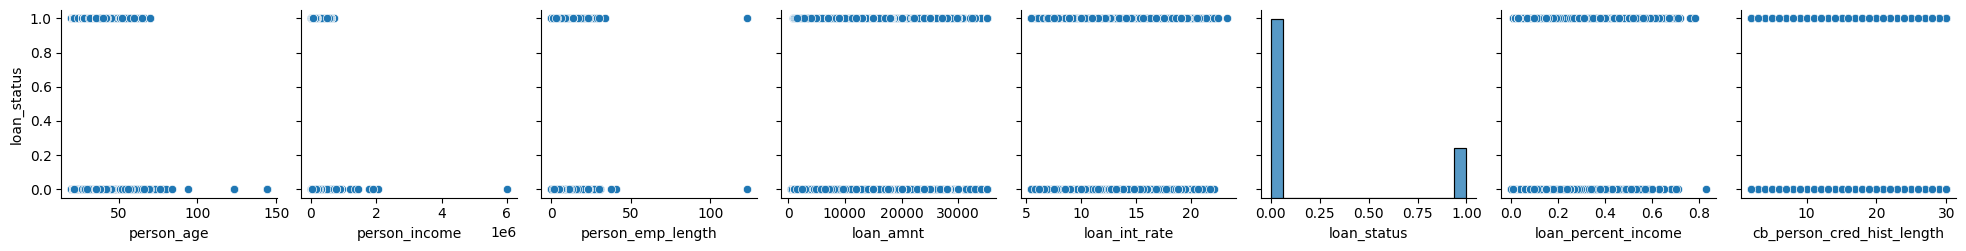

In [153]:
## vamos fazer um gráfico de correlação dos dados, com o loan_status
sns.pairplot(df, y_vars='loan_status')

<Axes: >

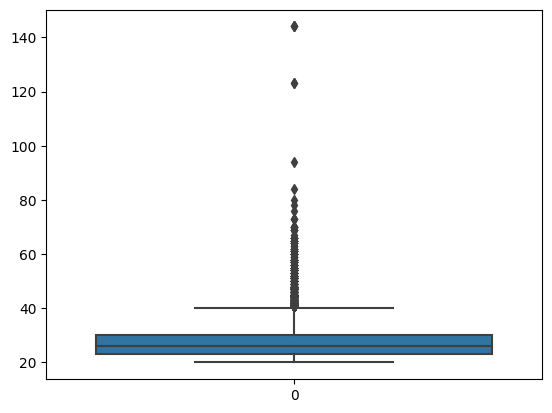

In [154]:
#person_age aqui temos algumas idades bem discrepantes, vamos retira-las
sns.boxplot(df[df.columns[0]])

In [155]:
## Retirando outliers em person_age
Q2_person_age = df['person_age'].median()
Q1_person_age = df.loc[df['person_age'] < Q2_person_age, 'person_age'].median()
Q3_person_age = df.loc[df['person_age'] > Q2_person_age, 'person_age'].median()
IQR_person_age = Q3_person_age - Q1_person_age
SUPERIOR_person_age = Q3_person_age + (1.5 * IQR_person_age)
INFERIOR_person_age = Q1_person_age - (1.5 * IQR_person_age)
df = df.query('person_age <= @SUPERIOR_person_age & person_age >= @INFERIOR_person_age')

Idade máxima:  43 
idade mínima:  20


<Axes: >

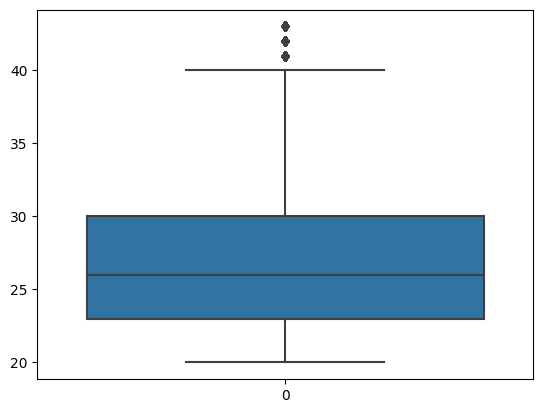

In [156]:
## Visualizando novos dados da idade
print('Idade máxima: ', df['person_age'].max(), '\nidade mínima: ', df['person_age'].min())
sns.boxplot(df['person_age'])

<Axes: >

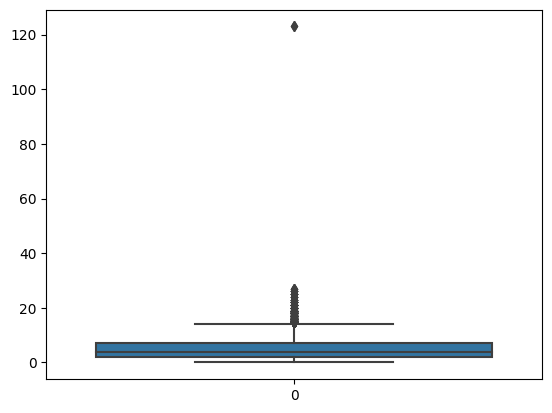

In [157]:
## Vamos retirar os outliers da coluna person_emp_length, apenas dando uma olhada breve ja podemos ver alguns outliers
sns.boxplot(df['person_emp_length'])

In [158]:
## Retirando outliers em person_emp_length
Q2_person_emp_length = df['person_emp_length'].median()
Q1_person_emp_length = df.loc[df['person_emp_length'] < Q2_person_emp_length, 'person_emp_length'].median()
Q3_person_emp_length = df.loc[df['person_emp_length'] > Q2_person_emp_length, 'person_emp_length'].median()
IQR_person_emp_length = Q3_person_emp_length - Q1_person_emp_length
SUPERIOR_person_emp_length = Q3_person_emp_length + 1.5*IQR_person_emp_length
INFERIOR_person_emp_length = Q1_person_emp_length - 1.5*IQR_person_emp_length
df = df.query('person_emp_length > @INFERIOR_person_emp_length & person_emp_length < @SUPERIOR_person_emp_length')

<Axes: ylabel='person_emp_length'>

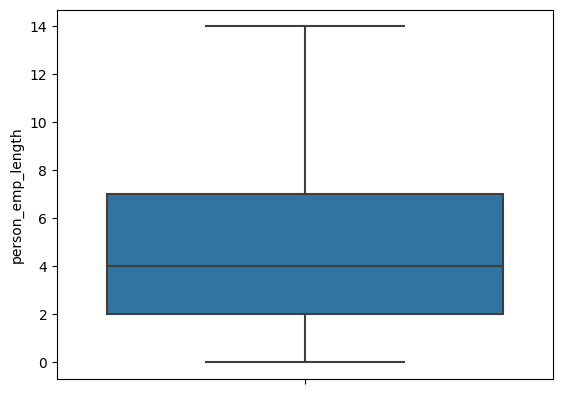

In [159]:
## Retiramos todos os outliers
sns.boxplot(data=df, y='person_emp_length')

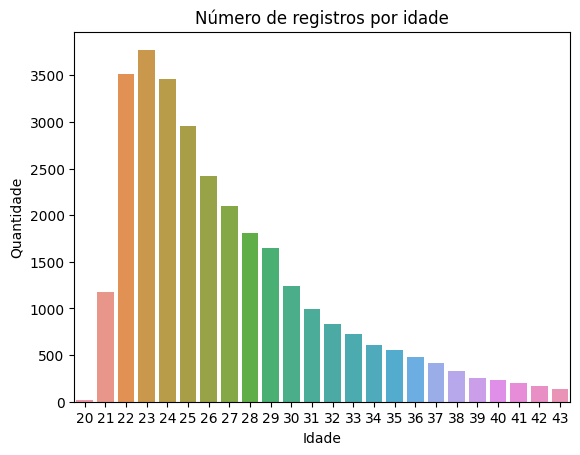

In [160]:
sns.countplot(data=df, x='person_age')
plt.title('Número de registros por idade')
plt.xlabel('Idade')
plt.ylabel('Quantidade');

#### Vamos utilizar o labelencoder para trocar algumas parametros strings para numérios

In [161]:
lble0 = LabelEncoder() # person_home_ownership
lble1 = LabelEncoder() # loan_intent
lble2 = LabelEncoder() # loan_grade
lble3 = LabelEncoder() # cb_person_default_on_file
df.loc[:,'person_home_ownership'] = lble0.fit_transform(df['person_home_ownership'])
df.loc[:, 'loan_intent'] = lble1.fit_transform(df['loan_intent'])
df.loc[:, 'loan_grade'] = lble2.fit_transform(df['loan_grade'])
df.loc[:, 'cb_person_default_on_file'] = lble3.fit_transform(df['cb_person_default_on_file'])

In [162]:
## Vamos retirar todos os valores nulos da tabela
df.dropna(inplace=True)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27175 entries, 1 to 32296
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  27175 non-null  int64  
 1   person_income               27175 non-null  int64  
 2   person_home_ownership       27175 non-null  object 
 3   person_emp_length           27175 non-null  float64
 4   loan_intent                 27175 non-null  object 
 5   loan_grade                  27175 non-null  object 
 6   loan_amnt                   27175 non-null  int64  
 7   loan_int_rate               27175 non-null  float64
 8   loan_status                 27175 non-null  int64  
 9   loan_percent_income         27175 non-null  float64
 10  cb_person_default_on_file   27175 non-null  object 
 11  cb_person_cred_hist_length  27175 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.7+ MB


<Axes: xlabel='loan_status', ylabel='count'>

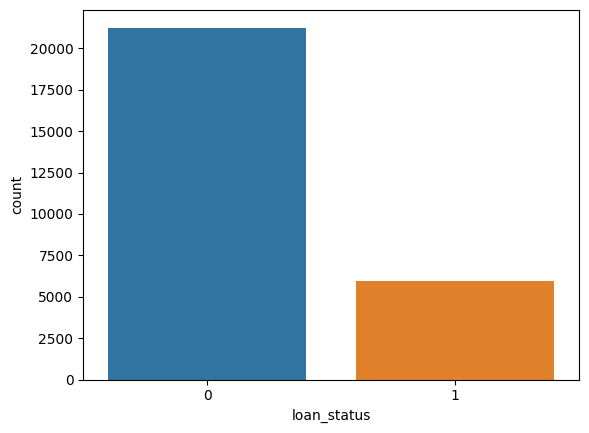

In [164]:
## Vamos ver quanto quantos inadimplentes e não-inandimplentes temos na base de dados
sns.countplot(x=df['loan_status'])
## Aqui ja conseguimos ver que temos uma base de dados desbalanceada onde temos muitos não-inadimplentes e poucos inadimplentes

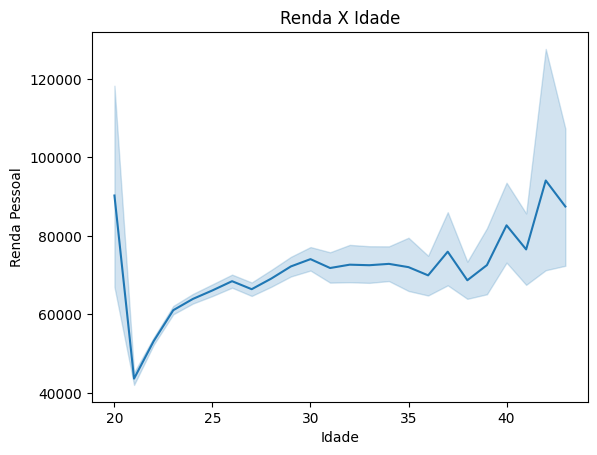

In [165]:
sns.lineplot(data=df, x='person_age', y='person_income')
plt.title('Renda X Idade')
plt.ylabel('Renda Pessoal')
plt.xlabel('Idade');

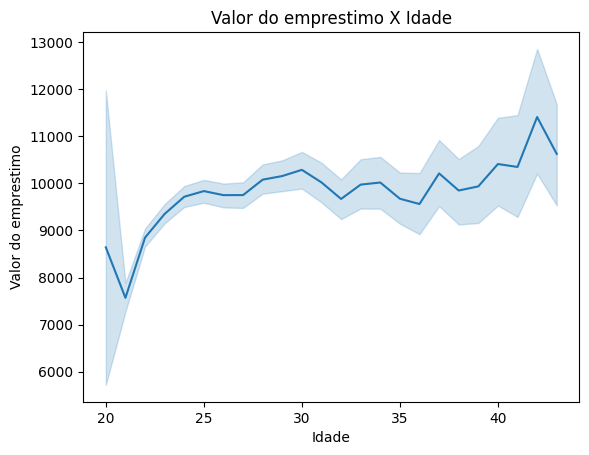

In [166]:
sns.lineplot(data=df, y='loan_amnt', x='person_age', )
plt.title('Valor do emprestimo X Idade')
plt.xlabel('Idade')
plt.ylabel('Valor do emprestimo');

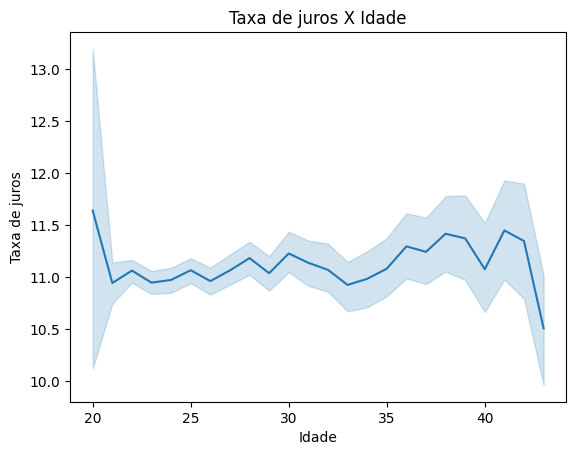

In [167]:
sns.lineplot(data=df, x='person_age', y='loan_int_rate')
plt.title('Taxa de juros X Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de juros');

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

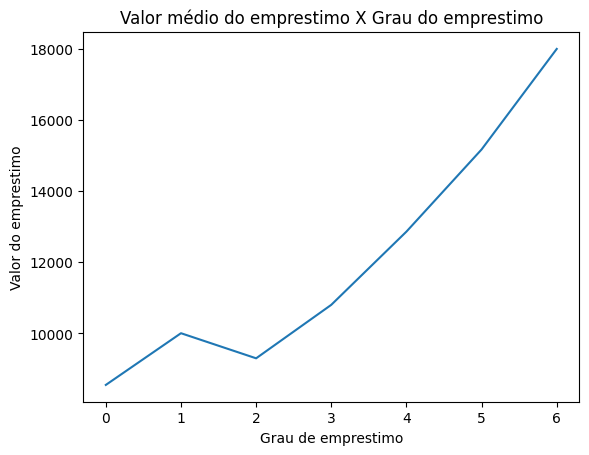

In [168]:
plt.plot(df.groupby('loan_grade')['loan_amnt'].mean())
display(lble2.inverse_transform([i for i in range(7)]))
plt.xlabel('Grau de emprestimo')
plt.ylabel('Valor do emprestimo')
plt.title('Valor médio do emprestimo X Grau do emprestimo');

array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'], dtype=object)

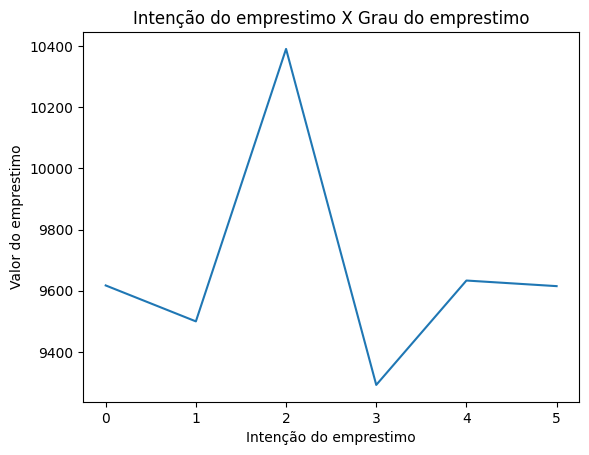

In [169]:
plt.plot(df.groupby('loan_intent')['loan_amnt'].mean())
display(lble1.inverse_transform([i for i in range(6)]))
plt.xlabel('Intenção do emprestimo')
plt.ylabel('Valor do emprestimo')
plt.title('Intenção do emprestimo X Grau do emprestimo');

In [170]:
df.to_csv('dataset\processed_df.csv')

## Preparando dados

In [184]:
def metrics(acc_score, r2_score_model, asp, cm):
    print(f'''
    Accuracy_Score-----------{accu_score:.2f}
    R2_Score-----------------{r2_score_model:.2f}
    Avarege Precision Score--{asp:.2f}
    ''')
    sns.heatmap(cm, annot=True);

In [185]:
df = pd.read_csv('dataset\processed_df.csv')

X = df.drop(columns=['loan_status'])
y = df['loan_status']

## Preprocessamento
mms = MinMaxScaler()
X = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26, test_size=0.2)

In [186]:
X_train.shape, X_test.shape

((21740, 12), (5435, 12))

## MLPClassifier

In [174]:
## Instanciando modelo
Model_MLPClassifier = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 2))

## Treinando modelo
Model_MLPClassifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 2))


    Accuracy_Score-----------0.90
    R2_Score-----------------0.43
    Avarege Precision Score--0.65
    


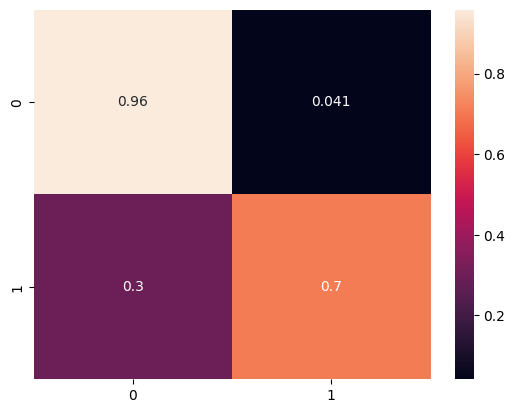

In [199]:
## Avaliando modelo
ypred = Model_MLPClassifier.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
r2_score_model = r2_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred, normalize='true')
asp = average_precision_score(y_test, ypred)
metrics(accu_score, r2_score_model, asp, cm)

## LinearSVC

In [178]:
## Instanciando modelo
Model_LinearSVC = LinearSVC()

## Treinando modelo
Model_LinearSVC.fit(X_train, y_train)

LinearSVC()


    Accuracy_Score-----------0.85
    R2_Score-----------------0.09
    Avarege Precision Score--0.45
    


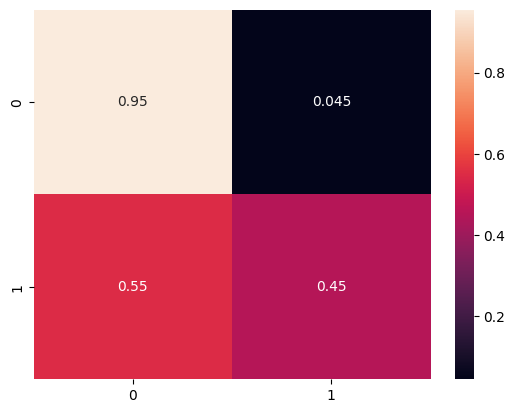

In [198]:
## Avaliando modelo
ypred = Model_LinearSVC.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
r2_score_model = r2_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred, normalize='true')
asp = average_precision_score(y_test, ypred)
metrics(accu_score, r2_score_model, asp, cm)

## RandomForestClassifier

In [195]:
## Instanciando modelo
Model_RandomForestClassifier = RandomForestClassifier()

## Treinando modelo
Model_RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()


    Accuracy_Score-----------0.93
    R2_Score-----------------0.58
    Avarege Precision Score--0.74
    


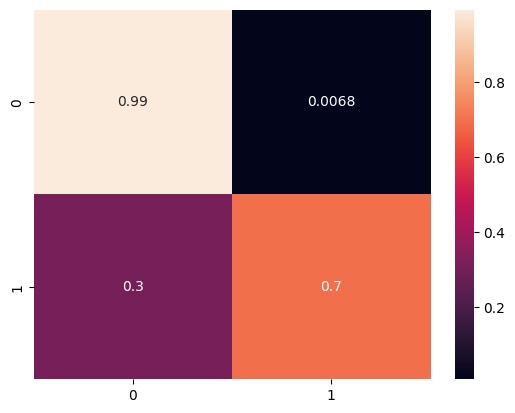

In [197]:
## Avaliando modelo
ypred = Model_RandomForestClassifier.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
r2_score_model = r2_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred, normalize='true')
asp = average_precision_score(y_test, ypred)
metrics(accu_score, r2_score_model, asp, cm)

## KNeighborsClassifier

In [200]:
## Instanciando modelo
Model_KNeighborsClassifier = KNeighborsClassifier()

## Treinando modelo
Model_KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()


    Accuracy_Score-----------0.87
    R2_Score-----------------0.26
    Avarege Precision Score--0.54
    


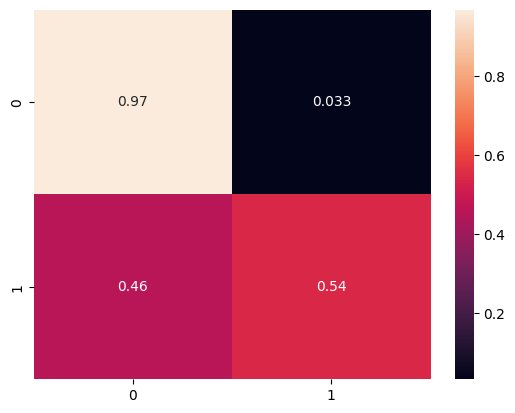

In [201]:
## Avaliando modelo
ypred = Model_KNeighborsClassifier.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
r2_score_model = r2_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred, normalize='true')
asp = average_precision_score(y_test, ypred)
metrics(accu_score, r2_score_model, asp, cm)

## DummyClassifier
#### Modelo Dummy para avaliar os modelo acima

In [204]:
## Instanciando modelo
Model_DummyClassifier = DummyClassifier()

## Treinando modelo
Model_DummyClassifier.fit(X_train, y_train)

DummyClassifier()


    Accuracy_Score-----------0.78
    R2_Score------------------0.28
    Avarege Precision Score--0.22
    


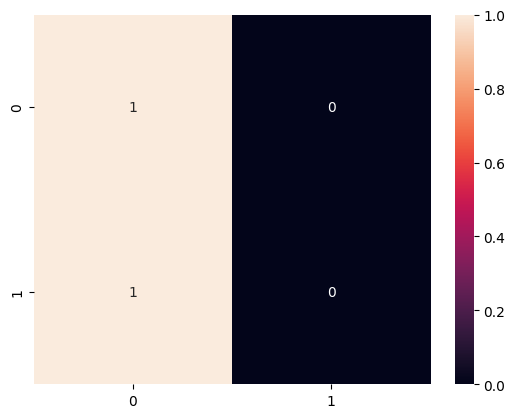

In [205]:
## Avaliando modelo
ypred = Model_DummyClassifier.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
r2_score_model = r2_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred, normalize='true')
asp = average_precision_score(y_test, ypred)
metrics(accu_score, r2_score_model, asp, cm)

Para o modelo dummy chutando apenas um valor conseguiu atigir 78% de accuracy, os modelo anteriores conseguiram
atingir valores melhores, contudo podemos fazer algo a mais para melhores esse desempenho, usaremos oversampling

## Oversampling

In [224]:
from imblearn.over_sampling  import SMOTE

In [225]:
smote = SMOTE(sampling_strategy='minority')
X_over_sampling, y_over_sampling = smote.fit_resample(X_train, y_train)

In [226]:
## Usaremos essa base para treinar o modelo, diferente da anterior ela esta mais equilibrada nas classes
X_over_sampling.shape, y_over_sampling.shape

((33994, 12), (33994,))

In [227]:
## Base desbalanceada
np.unique(y_train.values, return_counts=True)

(array([0, 1], dtype=int64), array([16997,  4743], dtype=int64))

In [228]:
## Base balanceada
np.unique(y_under_sampling.values, return_counts=True)

(array([0, 1], dtype=int64), array([16997, 16997], dtype=int64))

#### Vamos escolher o modelo que teve melhor desempenho e treinar novamente para ver se há alguma melhora
Escolhemos então o RandomForestClassifer que teve o melhor desempenho

In [229]:
## Instanciando modelo
Modelo2_RandomForestClassifier = RandomForestClassifier()

## Treinando modelo
Modelo2_RandomForestClassifier.fit(X_over_sampling, y_over_sampling)

RandomForestClassifier()


    Accuracy_Score-----------0.92
    R2_Score-----------------0.55
    Avarege Precision Score--0.72
    


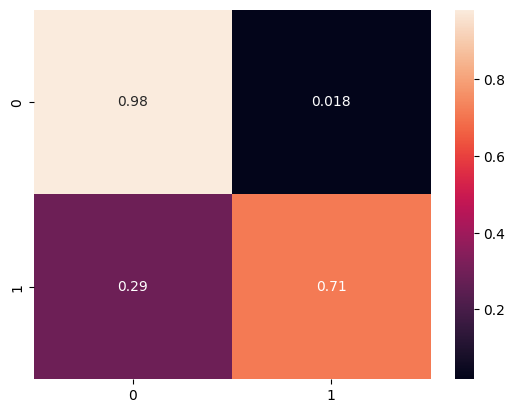

In [230]:
## Avaliando modelo
ypred = Modelo2_RandomForestClassifier.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
r2_score_model = r2_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred, normalize='true')
asp = average_precision_score(y_test, ypred)
metrics(accu_score, r2_score_model, asp, cm)

##### Não houve melhora significativa ao utilizar a tecnica de OverSampling

## Conclusão

De todos os modelo treinados o que teve melhor desempenho foi o RandomForestClassifier, conseguindo acertar de 70% dos e 99% dos clientes não inadimplentes.R2_Score nos diz que as variáveis explicam certa de 58% o resultado da previsão, tendo então espaço para encaixar variáveis mais notórias se esse for o caso, ja o Avaragea Precision Score, nos diz que o modelo desempenhou de forma razoavel tendo a pontuação de 0.74 de no máximo 1, indicando que é capaz de identificar de forma confiável os casos postivivos.

## Salvando modelo
####

In [231]:
import pickle

In [233]:
with open('Model/model.pkl', 'wb') as path:
    pickle.dump(Model_RandomForestClassifier, path)